<h1><center>Landmark Extraction, Preprocessing & Model Building</center></h1>

In [29]:
import cv2
import mediapipe as mp
import os
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import MinMaxScaler

## Visualization

<Figure size 1500x1500 with 0 Axes>

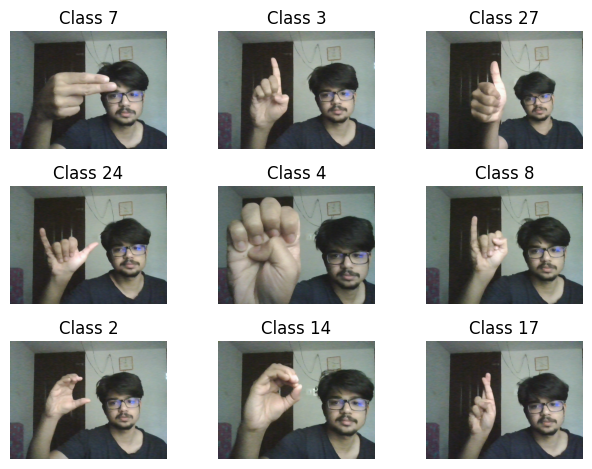

In [30]:
dataset_folder = '../dataset/data'

all_classes = os.listdir(dataset_folder)

selected_classes = random.sample([class_id for class_id in all_classes if 
                                  os.path.isdir(os.path.join(dataset_folder, class_id))], 9)

plt.figure(figsize=(15, 15))
fig, axes = plt.subplots(3, 3)

axes = axes.flatten()

for i, class_id in enumerate(selected_classes):
    class_folder = os.path.join(dataset_folder, class_id)

    img_files = os.listdir(class_folder)

    if img_files:
        img_name = random.choice(img_files)
        image_path = os.path.join(class_folder, img_name)

        img_bgr = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

        axes[i].imshow(img_rgb)
        axes[i].set_title(f"Class {class_id}")
        axes[i].axis('off')

plt.tight_layout()
plt.show()

<Figure size 2000x2000 with 0 Axes>

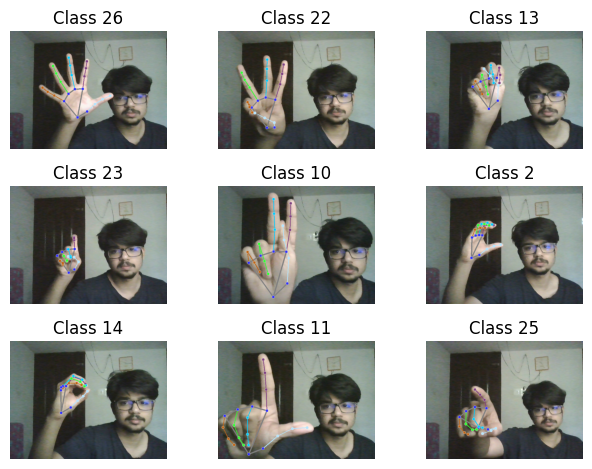

In [31]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

selected_classes = random.sample([class_id for class_id in all_classes if 
                                  os.path.isdir(os.path.join(dataset_folder, class_id))], 9)

plt.figure(figsize=(20, 20))
fig, axes = plt.subplots(3, 3)

axes = axes.flatten()

for i, class_id in enumerate(selected_classes):
    class_folder = os.path.join(dataset_folder, class_id)

    img_files = os.listdir(class_folder)

    if img_files:
        img_name = random.choice(img_files)
        image_path = os.path.join(class_folder, img_name)

        img_bgr = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        
        results = hands.process(img_rgb)
        
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(
            img_rgb,
            hand_landmarks,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())
            
            axes[i].imshow(img_rgb)
            axes[i].set_title(f"Class {class_id}")
            axes[i].axis('off')

plt.tight_layout()
plt.show()

In [32]:
selected_class_id = random.choice(selected_classes)

class_folder = os.path.join(dataset_folder, selected_class_id)

img_files = os.listdir(class_folder)

if img_files:
    img_name = random.choice(img_files)
    image_path = os.path.join(class_folder, img_name)

    img_bgr = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
    results = hands.process(img_rgb)
    
    for hand_landmarks in results.multi_hand_landmarks:
        for i in range(len(hand_landmarks.landmark)):
            print(hand_landmarks.landmark[i])
        print(f"Class ID: {selected_class_id}")

x: 0.39249837
y: 0.7060585
z: 5.54699e-07

x: 0.4341719
y: 0.6109973
z: -0.018681962

x: 0.42071128
y: 0.5011973
z: -0.016259702

x: 0.3873556
y: 0.42537528
z: -0.017413704

x: 0.366244
y: 0.36821157
z: -0.0180781

x: 0.40080154
y: 0.4691649
z: 0.009997997

x: 0.4001348
y: 0.3618078
z: -0.0065400684

x: 0.39665458
y: 0.29967263
z: -0.015427881

x: 0.39356935
y: 0.24070033
z: -0.018412312

x: 0.35863006
y: 0.48080856
z: 0.006501327

x: 0.34910697
y: 0.37117428
z: -0.01917267

x: 0.34145686
y: 0.2979753
z: -0.033710465

x: 0.33461577
y: 0.23233972
z: -0.03775988

x: 0.3160708
y: 0.5121846
z: -0.0017394022

x: 0.31128886
y: 0.45229983
z: -0.05359292

x: 0.34405518
y: 0.5290124
z: -0.060743798

x: 0.36663952
y: 0.590922
z: -0.046419628

x: 0.2751942
y: 0.5551889
z: -0.010071246

x: 0.27026284
y: 0.49472567
z: -0.049594253

x: 0.3022439
y: 0.5395688
z: -0.04670533

x: 0.32721585
y: 0.58795446
z: -0.032868493

Class ID: 10


## Preprocessing and Landmark Extraction

In [33]:
datagen = ImageDataGenerator(
    zca_whitening=True, 
    zca_epsilon=1e-06,
    rotation_range=20, 
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    brightness_range=[0.5, 1.5], 
    shear_range=10, 
    zoom_range=0.2, 
    channel_shift_range=0.1,  
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=True, 
    vertical_flip=True
)

C:\Users\VISHNU PRASAD\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\preprocessing\image.py:1444: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn(


C:\Users\VISHNU PRASAD\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\preprocessing\image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
C:\Users\VISHNU PRASAD\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\preprocessing\image.py:1885: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


<Figure size 1500x1500 with 0 Axes>

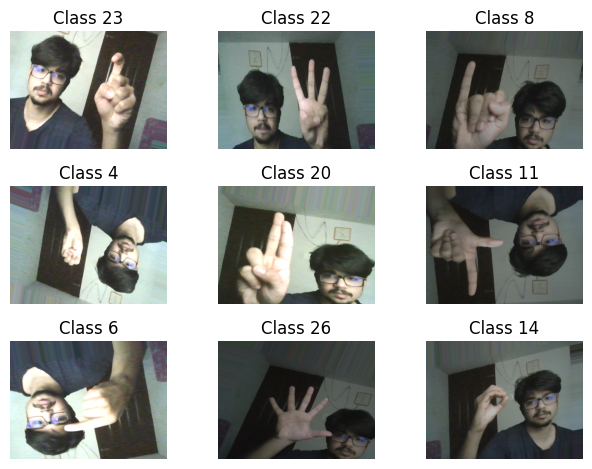

In [34]:
all_classes = os.listdir(dataset_folder)
selected_classes = random.sample([class_id for class_id in all_classes if 
                                  os.path.isdir(os.path.join(dataset_folder, class_id))], 9)

plt.figure(figsize=(15, 15))
fig, axes = plt.subplots(3, 3)

axes = axes.flatten()

for i, class_id in enumerate(selected_classes):
    class_folder = os.path.join(dataset_folder, class_id)
    
    if not os.path.isdir(class_folder):
        continue

    image_name = random.choice(os.listdir(class_folder))
    image_path = os.path.join(class_folder, image_name)

    frame = cv2.imread(image_path)

    frame = frame.reshape((1,) + frame.shape)
    augmented_frames = datagen.flow(frame, batch_size=1)

    augmented_frame = next(augmented_frames)[0].astype(np.uint8)

    rgb_frame = cv2.cvtColor(augmented_frame, cv2.COLOR_BGR2RGB)

    axes[i].imshow(rgb_frame)
    axes[i].set_title(f"Class {class_id}")
    axes[i].axis('off') 
        
plt.tight_layout()
plt.show()

In [35]:
data = []
labels = []

for class_id in os.listdir(dataset_folder):
    class_folder = os.path.join(dataset_folder, class_id)
    
    if not os.path.isdir(class_folder):
        continue

    for image_name in os.listdir(class_folder):
        image_path = os.path.join(class_folder, image_name)

        frame = cv2.imread(image_path)

        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        results = hands.process(rgb_frame)

        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                coordinates = []
                for landmark in hand_landmarks.landmark:
                    x = landmark.x
                    y = landmark.y
                    coordinates.extend([x, y])

                data.append(coordinates)
                labels.append(class_id)

In [36]:
augmented_data = []
augmented_labels = []

for class_id in os.listdir(dataset_folder):
    class_folder = os.path.join(dataset_folder, class_id)
    
    if not os.path.isdir(class_folder):
        continue

    for image_name in os.listdir(class_folder):
        image_path = os.path.join(class_folder, image_name)

        frame = cv2.imread(image_path)

        frame = frame.reshape((1,) + frame.shape) 
        augmented_frames = datagen.flow(frame, batch_size=1)

        augmented_frame = next(augmented_frames)[0].astype(np.uint8)

        rgb_frame = cv2.cvtColor(augmented_frame, cv2.COLOR_BGR2RGB)

        results = hands.process(rgb_frame)

        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                coordinates = []
                for landmark in hand_landmarks.landmark:
                    x = landmark.x
                    y = landmark.y
                    coordinates.extend([x, y])

                augmented_data.append(coordinates)
                augmented_labels.append(class_id)

data = np.vstack([data, augmented_data])
labels = labels + augmented_labels

In [38]:
data_array = np.array(data)

scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(data_array)

data = normalized_data.tolist()

## Model Building

In [44]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [45]:
data_array = np.array(data)
labels_array = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(data_array, labels_array, test_size = 0.2)

In [49]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [50]:
model = Sequential([
          Dense(units=64, input_dim=X_train.shape[1], activation='relu'),
          Dense(units=32, activation='relu'),
          Dense(units=len(np.unique(labels)), activation='softmax')])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=75, validation_split=0.2)

Epoch 1/75
112/112 [==============================] - 2s 7ms/step - loss: 3.2985 - accuracy: 0.0651 - val_loss: 3.2565 - val_accuracy: 0.1122
Epoch 2/75
112/112 [==============================] - 0s 3ms/step - loss: 3.1759 - accuracy: 0.1577 - val_loss: 3.1052 - val_accuracy: 0.1717
Epoch 3/75
112/112 [==============================] - 0s 2ms/step - loss: 2.9554 - accuracy: 0.2268 - val_loss: 2.8062 - val_accuracy: 0.2604
Epoch 4/75
112/112 [==============================] - 0s 3ms/step - loss: 2.6278 - accuracy: 0.2983 - val_loss: 2.4963 - val_accuracy: 0.3244
Epoch 5/75
112/112 [==============================] - 0s 3ms/step - loss: 2.3006 - accuracy: 0.4134 - val_loss: 2.1849 - val_accuracy: 0.4276
Epoch 6/75
112/112 [==============================] - 0s 3ms/step - loss: 2.0268 - accuracy: 0.4954 - val_loss: 1.9404 - val_accuracy: 0.5174
Epoch 7/75
112/112 [==============================] - 0s 3ms/step - loss: 1.7953 - accuracy: 0.5697 - val_loss: 1.7430 - val_accuracy: 0.5825
Epoch 

112/112 [==============================] - 0s 3ms/step - loss: 0.1682 - accuracy: 0.9621 - val_loss: 0.2395 - val_accuracy: 0.9360
Epoch 59/75
112/112 [==============================] - 0s 3ms/step - loss: 0.1672 - accuracy: 0.9610 - val_loss: 0.2280 - val_accuracy: 0.9450
Epoch 60/75
112/112 [==============================] - 0s 2ms/step - loss: 0.1592 - accuracy: 0.9630 - val_loss: 0.2075 - val_accuracy: 0.9529
Epoch 61/75
112/112 [==============================] - 0s 3ms/step - loss: 0.1544 - accuracy: 0.9680 - val_loss: 0.2218 - val_accuracy: 0.9473
Epoch 62/75
112/112 [==============================] - 0s 3ms/step - loss: 0.1538 - accuracy: 0.9660 - val_loss: 0.2066 - val_accuracy: 0.9529
Epoch 63/75
112/112 [==============================] - 0s 3ms/step - loss: 0.1487 - accuracy: 0.9641 - val_loss: 0.2183 - val_accuracy: 0.9461
Epoch 64/75
112/112 [==============================] - 0s 4ms/step - loss: 0.1463 - accuracy: 0.9652 - val_loss: 0.1968 - val_accuracy: 0.9506
Epoch 65/75

In [51]:
model.evaluate(X_test, y_test.astype('int'))

35/35 [==============================] - 0s 2ms/step - loss: 0.2094 - accuracy: 0.9524


[0.20937156677246094, 0.9524236917495728]

In [52]:
model.save('hand_signals_model.keras')